# CELEBAL ASSIGNMENT 7

# HOUSE PRICE PREDICTION

# Name : Yash Pratap Singh

# Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## Load The Test and Train Data

In [2]:
df1=pd.read_csv('train.csv')
df2=pd.read_csv('test.csv')

In [3]:
df1.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df2.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Statistical Inforamtion of Train Data

In [5]:
df1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Statistical Inforamtion of Test Data

In [6]:
df2.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


df1.info()

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
print("Shape")
print("Training data : ", df1.shape)
print("Test data     : ", df2.shape)

Shape
Training data :  (1460, 81)
Test data     :  (1459, 80)


In [10]:
t = (df1.dtypes == 'object')
object_cols = list(t[t].index)
print("Categorical variables:")
print(object_cols)
print('-'*50)

t = (df1.dtypes == 'int')
num_cols = list(t[t].index)
print("Integer variables:")
print(num_cols)
print('-'*50)

t = (df1.dtypes == 'float')
num_cols = list(t[t].index)
print("Float variables:")
print('-'*50)

Categorical variables:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
--------------------------------------------------
Integer variables:
[]
--------------------------------------------------
Float variables:
--------------------------------------------------


In [12]:
f_desc = open('data_description.txt')
print(f_desc.read())
f_desc.close()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

## Check Missing Value

In [13]:
print("Missing value count in Train Data ",df1.isna().sum())

Missing value count in Train Data  Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [14]:
print("Missing value count in Train Data ",df2.isna().sum())

Missing value count in Train Data  Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


## Combining Train and Test Data

In [15]:
df = [df1,df2]
df_combined = pd.concat(df).reset_index(drop=True)

In [16]:
df_combined.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [17]:
print(df_combined.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64


## Visualize

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:title={'center':'Heatmap of missing values'}>

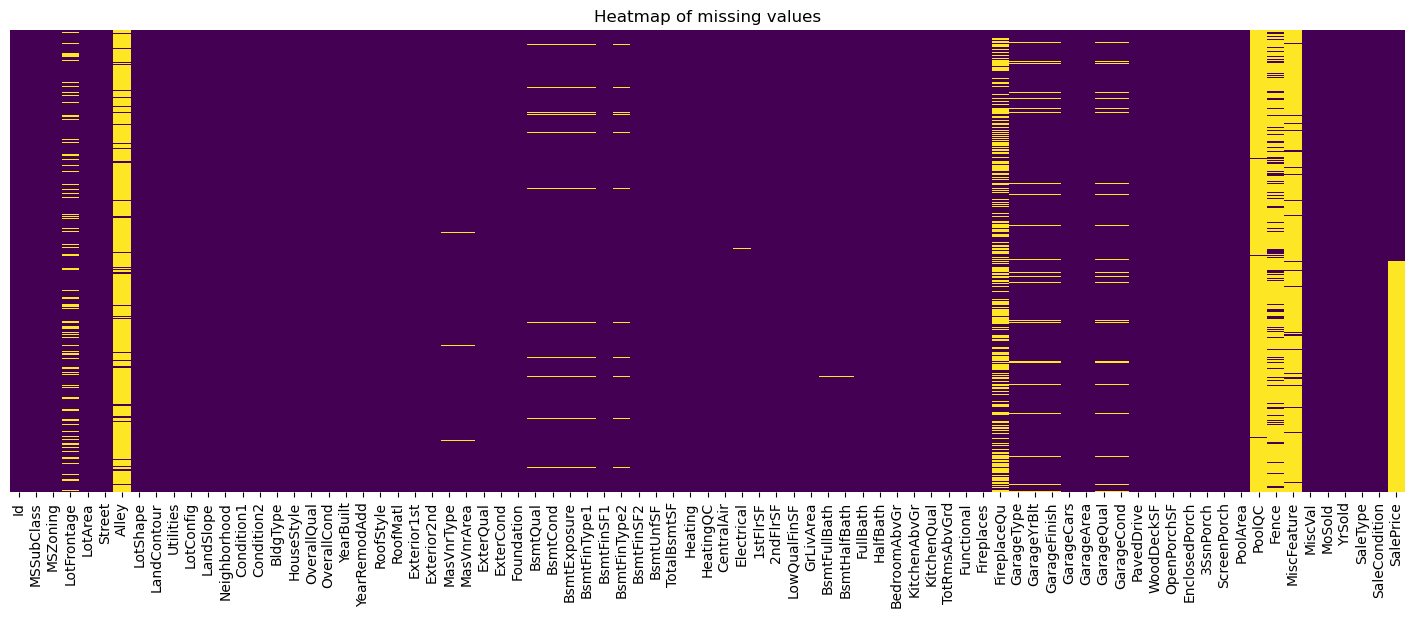

In [19]:
plt.figure(figsize=(18,6))
plt.title('Heatmap of missing values')
sns.heatmap(df_combined.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:title={'center':'No. Unique values of Categorical Features'}>

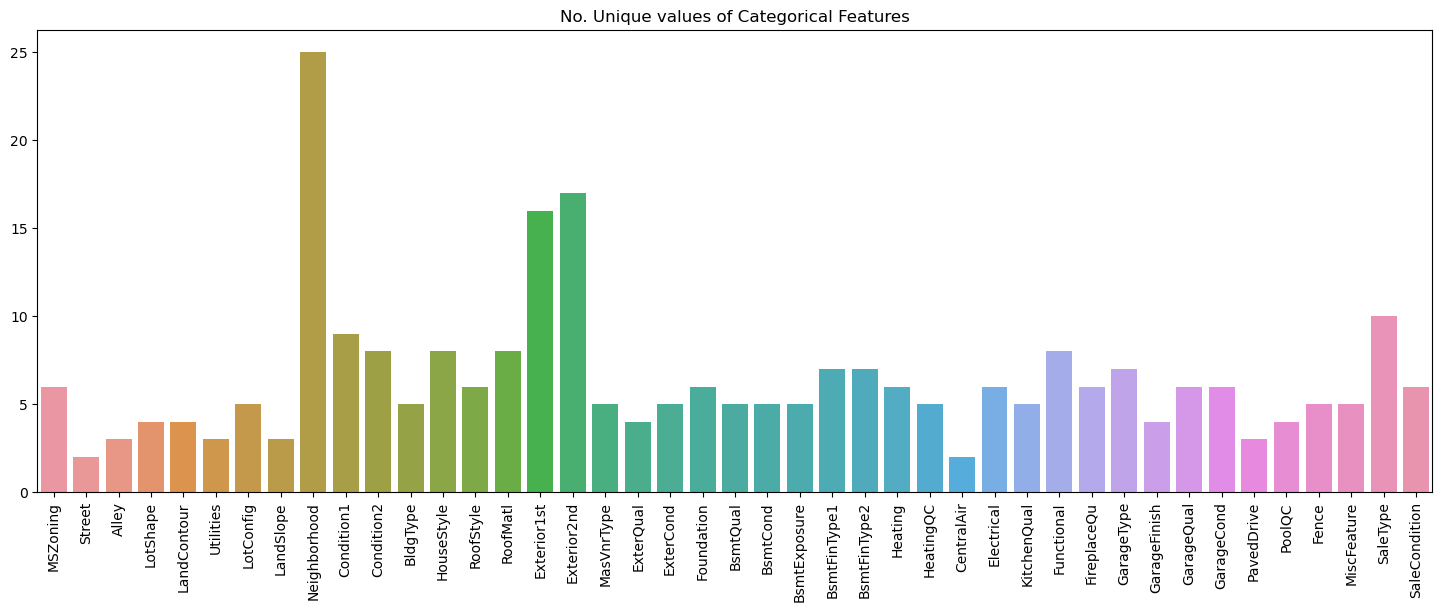

In [20]:
unique_values = []
for col in object_cols:
  unique_values.append(df_combined[col].unique().size)
plt.figure(figsize=(18,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

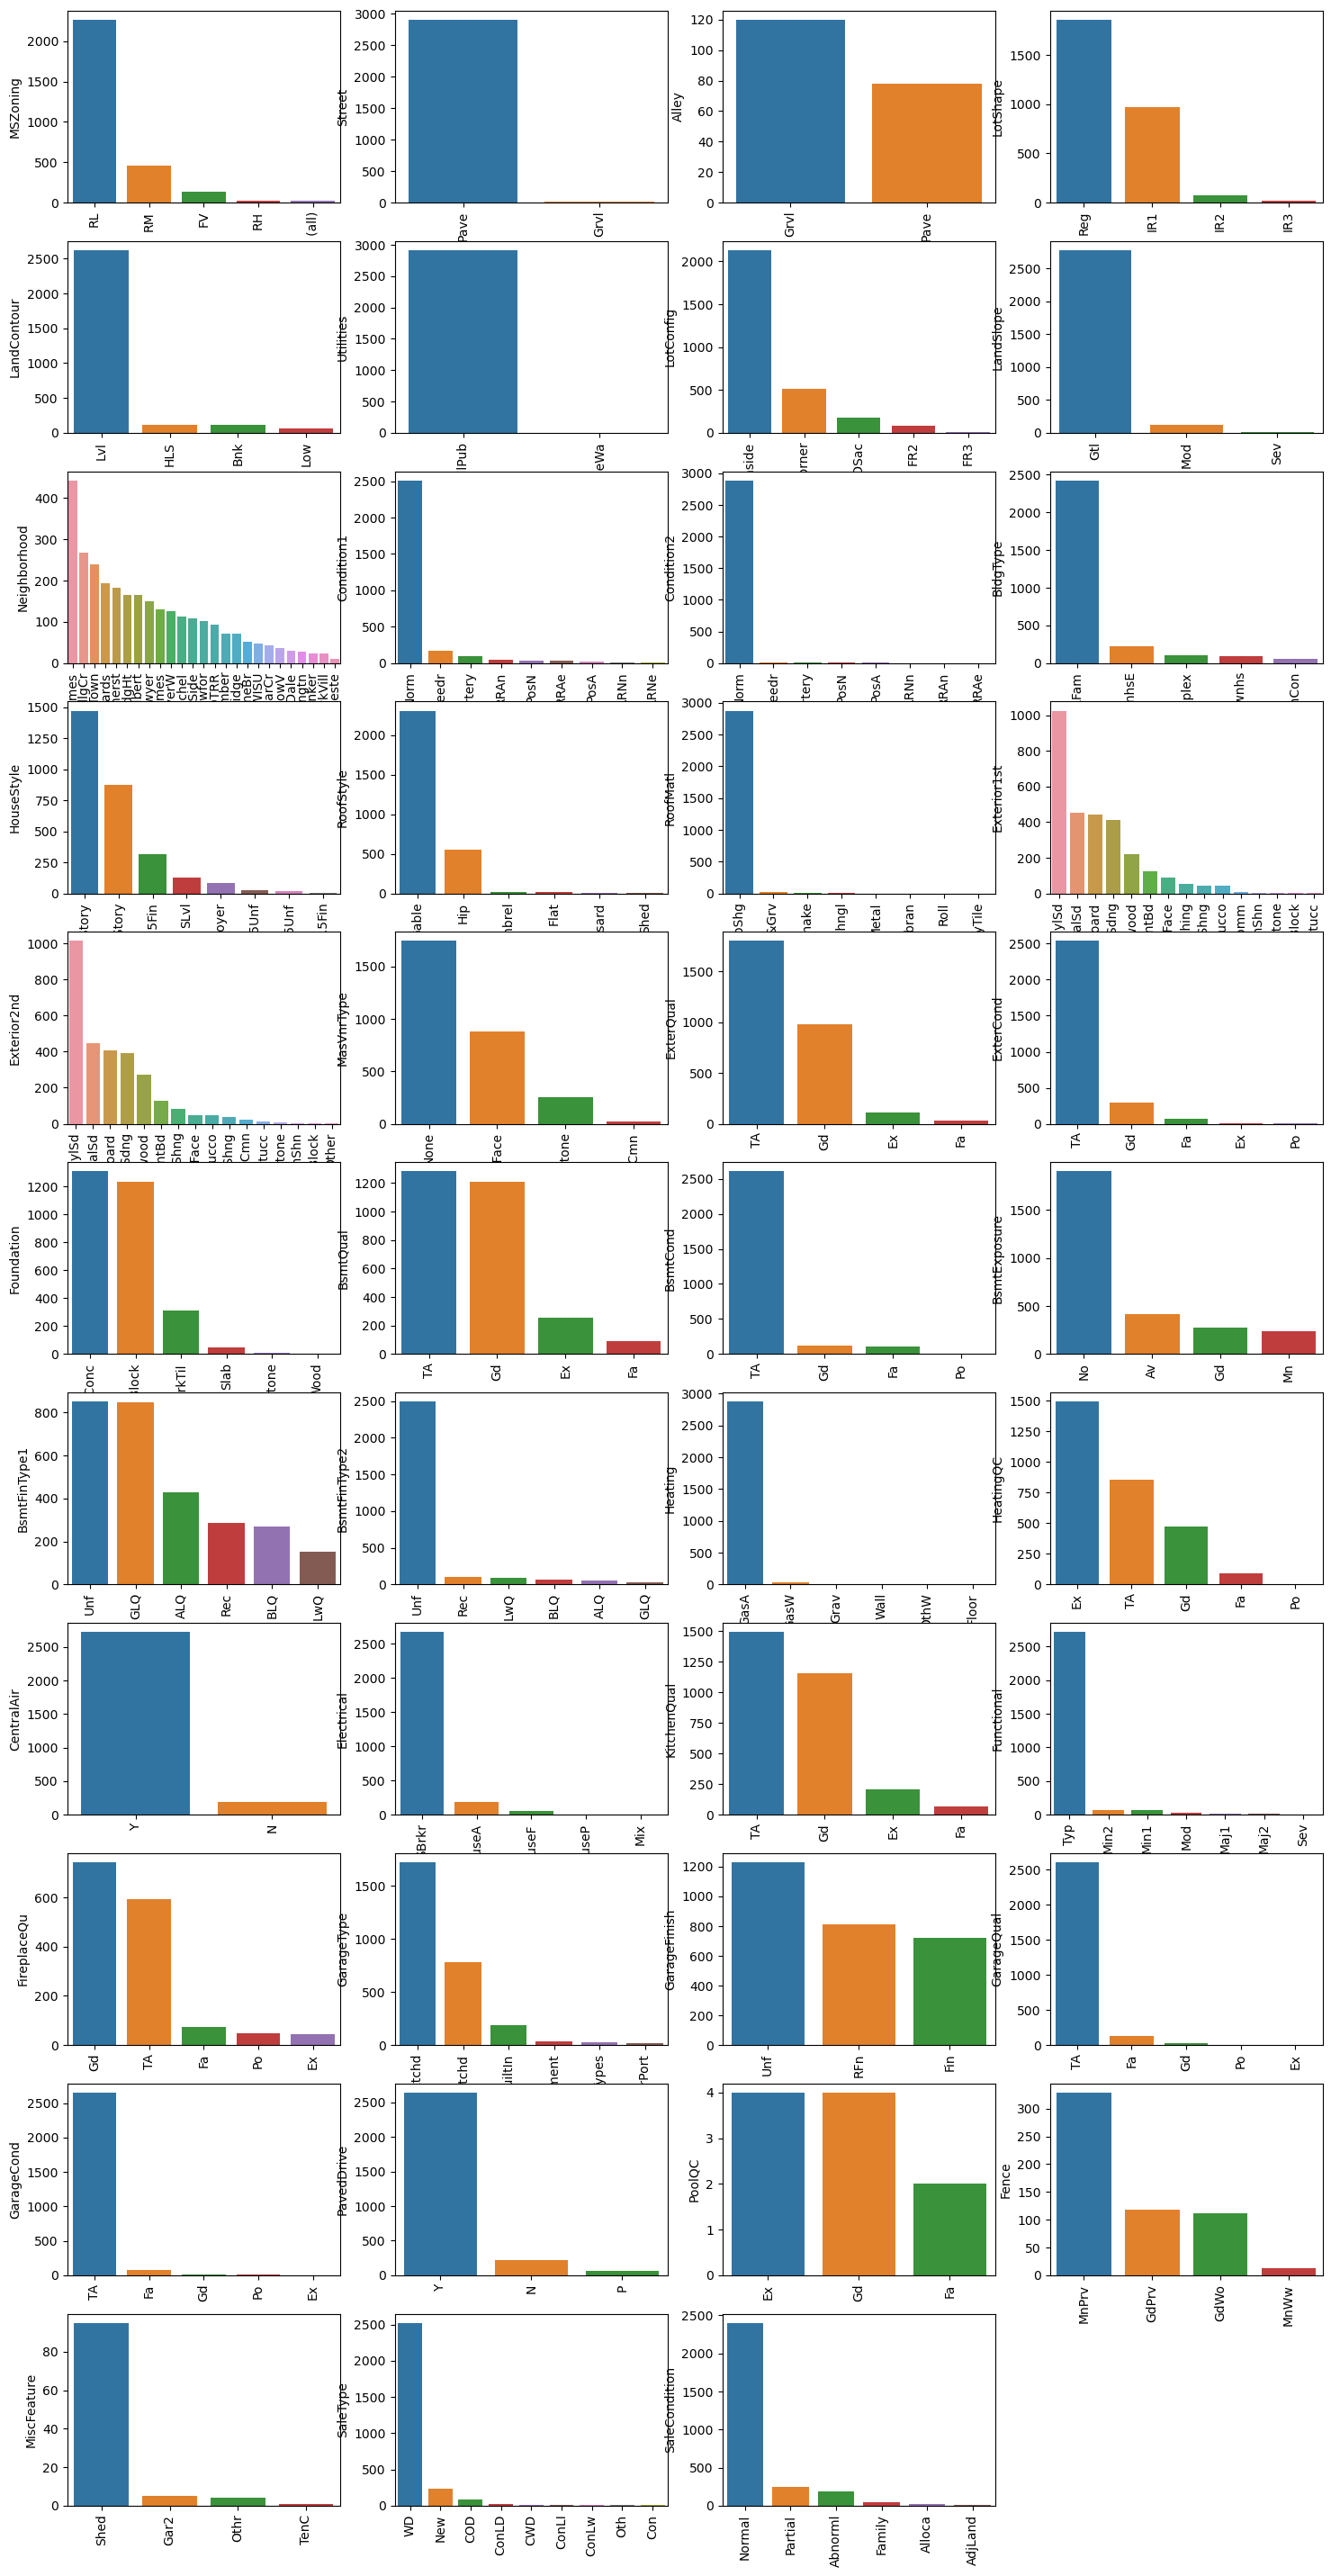

In [21]:
plt.figure(figsize=(18,36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
for col in object_cols:
  y = df_combined[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

## Fill the missing values

In [22]:
df_combined.drop(columns='Id',inplace=True); print('Drop Id \n')
df_combined['MSZoning'] = df_combined['MSZoning'].fillna(df_combined['MSZoning'].mode()[0])
df_combined['LotFrontage'] = df_combined['LotFrontage'].fillna(df_combined['LotFrontage'].mean())
df_combined.drop(columns='Alley',inplace=True); print('Drop Alley \n')

#df_combined['Utilities'] = df_combined['Utilities'].fillna(df_combined['Utilities'].mode()[0])
print(df_combined['Utilities'].value_counts())
df_combined.drop(columns='Utilities',inplace=True); print('Drop Utilities \n')

df_combined['Exterior1st'] = df_combined['Exterior1st'].fillna(df_combined['Exterior1st'].mode()[0])
df_combined['Exterior2nd'] = df_combined['Exterior2nd'].fillna(df_combined['Exterior2nd'].mode()[0])
df_combined['MasVnrType'] = df_combined['MasVnrType'].fillna(df_combined['MasVnrType'].mode()[0])
df_combined['MasVnrArea'] = df_combined['MasVnrArea'].fillna(df_combined['MasVnrArea'].mean())
df_combined['Electrical'] = df_combined['Electrical'].fillna(df_combined['Electrical'].mode()[0])
df_combined['KitchenQual'] = df_combined['KitchenQual'].fillna(df_combined['KitchenQual'].mode()[0])
df_combined['Functional'] = df_combined['Functional'].fillna(df_combined['Functional'].mode()[0])

#df_combined.loc[(df_combined['Fireplaces'] != 0) & (df_combined['FireplaceQu'].isnull()) ][['FireplaceQu','Fireplaces']]
df_combined['FireplaceQu'] = df_combined['FireplaceQu'].fillna('NA'); print('FirePlaceQu: Fill NA values for missing values \n')

df_combined.loc[(df_combined['PoolQC'].isnull()) & df_combined['PoolArea']>0][['PoolQC','PoolArea']]
df_combined.at[2599,'PoolQC'] = df_combined['PoolQC'].mode()[0]; print('PoolQC: Use mode for missing value with non-zero PoolAre \n')
df_combined['PoolQC'] = df_combined['PoolQC'].fillna('NA'); print('PoolQC: Use NA for remaining missing values \n')

df_combined['SaleType'].fillna(df_combined['SaleType'].mode()[0],inplace=True)
df_combined.drop(columns=['Fence','MiscFeature','SalePrice'],inplace=True); print('Drop Fence, MiscFeature and SalePrice\n')

# Basement Features
#df_combined.loc[df_combined['BsmtQual'].isnull()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']].head()
#df_combined.loc[df_combined['TotalBsmtSF'].isnull()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']]
print('Fill missing values of Basement features with NA or 0 \n')
df_combined['BsmtQual'] = df_combined['BsmtQual'].fillna('NA')
df_combined['BsmtCond'] = df_combined['BsmtCond'].fillna('NA')
df_combined['BsmtExposure'] = df_combined['BsmtExposure'].fillna('NA')
df_combined['BsmtFinType1'] = df_combined['BsmtFinType1'].fillna('NA')
df_combined['BsmtFinType2'] = df_combined['BsmtFinType2'].fillna('NA')

df_combined['BsmtFinSF1'] = df_combined['BsmtFinSF1'].fillna(int(0))
df_combined['BsmtFinSF2'] = df_combined['BsmtFinSF2'].fillna(int(0))
df_combined['BsmtUnfSF'] = df_combined['BsmtUnfSF'].fillna(int(0))
df_combined['TotalBsmtSF'] = df_combined['TotalBsmtSF'].fillna(int(0))
df_combined['BsmtFullBath'] = df_combined['BsmtFullBath'].fillna(int(0))
df_combined['BsmtHalfBath'] = df_combined['BsmtHalfBath'].fillna(int(0))

# Garage Features
# df_combined.loc[df_combined['GarageCond'].isnull()][['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']].head()
print('Fill missing values of Garage features with NA or 0 \n')
df_combined['GarageType'] = df_combined['GarageType'].fillna('NA')
df_combined['GarageFinish'] = df_combined['GarageFinish'].fillna('NA')
df_combined['GarageCond'] = df_combined['GarageCond'].fillna('NA')
df_combined['GarageQual'] = df_combined['GarageQual'].fillna('NA')
df_combined['GarageCars'] = df_combined['GarageCars'].fillna(int(0))
df_combined['GarageArea'] = df_combined['GarageArea'].fillna(int(0))
df_combined['GarageYrBlt'] = df_combined['GarageYrBlt'].fillna(int(0))

Drop Id 

Drop Alley 

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64
Drop Utilities 

FirePlaceQu: Fill NA values for missing values 

PoolQC: Use mode for missing value with non-zero PoolAre 

PoolQC: Use NA for remaining missing values 

Drop Fence, MiscFeature and SalePrice

Fill missing values of Basement features with NA or 0 

Fill missing values of Garage features with NA or 0 



In [23]:
df_combined.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,0,0,NA,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,0,0,NA,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,0,0,NA,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,...,272,0,0,0,NA,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,...,0,0,0,0,NA,0,12,2008,WD,Normal


In [24]:
print(df_combined.isnull().sum())

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 75, dtype: int64


## Preprocessing

In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
s = (df_combined.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',len(object_cols))

Categorical variables:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'SaleType', 'SaleCondition']
No. of. categorical features:  39


In [27]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df_combined[object_cols]))
OH_cols.index = df_combined.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = df_combined.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

In [28]:
df_final.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
# Check that the shapes are consistent

print('df_final shape:', df_final.shape)
print('df_train shape:', df1.shape)
print('df_test shape:',  df2.shape)

X_Train = pd.DataFrame(df_final[:1460])
X_Test  = pd.DataFrame(df_final[1460:])
Y_Train = df1['SalePrice']

print('\nCheck that the datasets are consistent:\n')
print('X_train shape', X_Train.shape)
print('Y_train shape:', Y_Train.shape)
print('X_test shape:',  X_Test.shape)

df_final shape: (2919, 287)
df_train shape: (1460, 81)
df_test shape: (1459, 80)

Check that the datasets are consistent:

X_train shape (1460, 287)
Y_train shape: (1460,)
X_test shape: (1459, 287)


## Model Selection and prediction

In [30]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Split the training set into training and validation set

X_train, X_valid, Y_train, Y_valid = train_test_split(X_Train, Y_Train, train_size=0.8, test_size=0.2,random_state=0)

In [31]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor()
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)
print(mean_absolute_error(Y_valid, Y_pred))
     

17548.465856164385


In [32]:
from sklearn.ensemble import GradientBoostingRegressor

model_GBR = GradientBoostingRegressor()
model_GBR.fit(X_train, Y_train)
Y_pred = model_GBR.predict(X_valid)
print(mean_absolute_error(Y_valid, Y_pred))

17220.327047175084


In [33]:
from sklearn.linear_model import SGDRegressor

model_SGD = SGDRegressor()
model_SGD.fit(X_train, Y_train)
Y_pred = model_SGD.predict(X_valid)
print(mean_absolute_error(Y_valid, Y_pred))

9226525899607272.0


In [34]:
from xgboost import XGBRegressor

model_XGBR = XGBRegressor(learning_rate=0.03,n_estimators=200,objective='reg:squarederror')
model_XGBR.fit(X_train,Y_train)
Y_pred = model_XGBR.predict(X_valid)
print(mean_absolute_error(Y_valid, Y_pred))

16227.43679098887


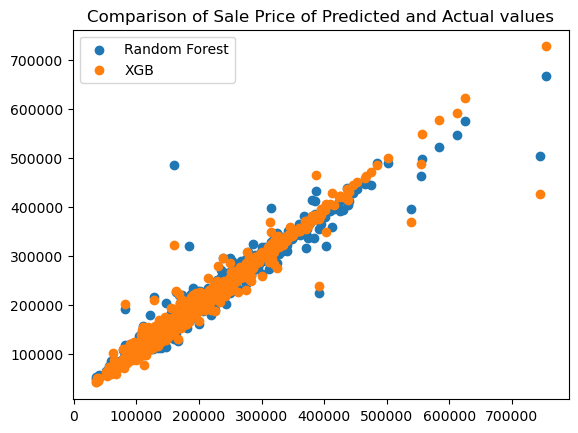

In [35]:
plt.figure()
plt.title('Comparison of Sale Price of Predicted and Actual values')
plt.scatter(Y_Train,model_RFR.predict(X_Train),label='Random Forest')
plt.scatter(Y_Train,model_XGBR.predict(X_Train),label='XGB')
plt.legend()

In [36]:
from sklearn.model_selection import GridSearchCV
model = XGBRegressor()

n_estimators   = [100, 200, 500]
learning_rates = [0.03,0.1,0.3]
objectives     = ['reg:squarederror']

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators' : n_estimators,
    'learning_rate':learning_rates,
    'objective' : objectives
    }

grid_cv = GridSearchCV(estimator = model,
            param_grid = hyperparameter_grid,
            scoring = 'neg_mean_absolute_error',
            return_train_score = True)

grid_cv.fit(X_Train,Y_Train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                          

In [37]:
grid_cv.best_score_

-16374.666374143835

In [38]:
grid_cv.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [39]:
Y_pred = grid_cv.predict(X_valid)
print(mean_absolute_error(Y_valid, Y_pred))

3205.1435413099316


In [40]:
regressor = grid_cv.best_estimator_
Y_pred = regressor.predict(X_valid)
print(mean_absolute_error(Y_valid, Y_pred))

3205.1435413099316


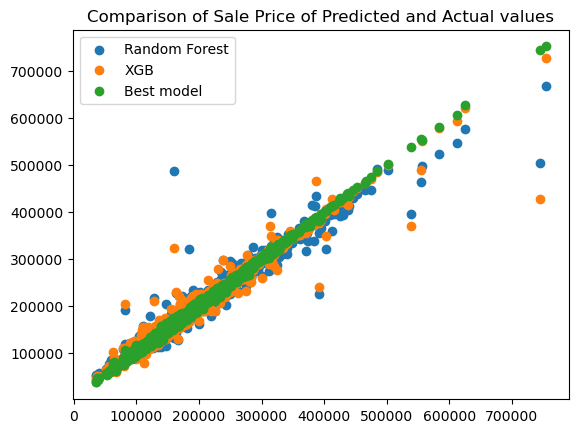

In [41]:
plt.figure()
plt.title('Comparison of Sale Price of Predicted and Actual values')
plt.scatter(Y_Train,model_RFR.predict(X_Train),label='Random Forest')
plt.scatter(Y_Train,model_XGBR.predict(X_Train),label='XGB')
plt.scatter(Y_Train,regressor.predict(X_Train),label='Best model')
plt.legend()

## Submission Data

In [42]:
Y_Pred = regressor.predict(X_Test)
Y_Pred 

array([124369.05, 159325.89, 181925.1 , ..., 158574.53, 113166.57,
       215299.12], dtype=float32)

In [43]:
Y_Pred.shape

(1459,)

In [44]:
sub = pd.DataFrame()
sub['Id'] = df2['Id']
sub['SalePrice'] = Y_Pred

In [45]:
sub.head()

,Id,SalePrice
0,1461,124369.046875
1,1462,159325.890625
2,1463,181925.093750
3,1464,187611.296875
4,1465,202871.703125


In [46]:
sub.to_csv('Submission.csv')  # saved the data in a new file

# THANK YOU